<a href="https://colab.research.google.com/github/Sunil-ai-007/pumkin-seed-classification/blob/main/PumpkinSeedsDataset_RF_SVM_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
Pumpkin_Seeds_Dataset = pd.read_excel("/content/Pumpkin_Seeds_Dataset.xlsx")

In [ ]:
Pumpkin_Seeds_Dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [ ]:
Pumpkin_Seeds_Dataset["Class"].replace({"Çerçevelik":0,"Ürgüp Sivrisi":1},inplace=True)

In [ ]:
Pumpkin_Seeds_Dataset.shape

(2500, 13)

In [ ]:
# Data Quality Check

In [ ]:
Pumpkin_Seeds_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 254.0 KB


In [ ]:
Pumpkin_Seeds_Dataset.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984,-0.236076
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308,-0.669514


In [ ]:
Pumpkin_Seeds_dataset_2 = Pumpkin_Seeds_Dataset.drop(["Area", "Perimeter","Convex_Area","Roundness","Aspect_Ration"], axis = 1)

In [ ]:
Pumpkin_Seeds_dataset_2.corr()

,Major_Axis_Length,Minor_Axis_Length,Equiv_Diameter,Eccentricity,Solidity,Extent,Compactness,Class
Major_Axis_Length,1.000000,0.099376,0.787078,0.704287,0.119291,-0.214990,-0.726958,0.561458
Minor_Axis_Length,0.099376,1.000000,0.690020,-0.590877,0.090915,0.233576,0.603441,-0.401362
Equiv_Diameter,0.787078,0.690020,1.000000,0.156246,0.159454,-0.010970,-0.156411,0.160303
Eccentricity,0.704287,-0.590877,0.156246,1.000000,0.043991,-0.327316,-0.981689,0.699319
Solidity,0.119291,0.090915,0.159454,0.043991,1.000000,0.067537,-0.019967,0.122674
Extent,-0.214990,0.233576,-0.010970,-0.327316,0.067537,1.000000,0.336984,-0.236076
Compactness,-0.726958,0.603441,-0.156411,-0.981689,-0.019967,0.336984,1.000000,-0.726676
Class,0.561458,-0.401362,0.160303,0.699319,0.122674,-0.236076,-0.726676,1.000000


In [ ]:
Pumpkin_Seeds_dataset_2.shape

(2500, 8)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = Pumpkin_Seeds_dataset_2["Class"]

In [ ]:
x = Pumpkin_Seeds_dataset_2[["Major_Axis_Length","Minor_Axis_Length","Equiv_Diameter","Eccentricity","Solidity","Extent","Compactness"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [ ]:
x_train.shape

(2000, 7)

In [ ]:
y_test.shape

(500,)

In [ ]:
x_test.shape

(500, 7)

In [ ]:
# Random Forest Model Building

In [ ]:
import sklearn.ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import numpy as np

In [ ]:
Pumpkin_Seeds_dataset_model = RandomForestClassifier(criterion='gini', n_estimators=5000, random_state=1, n_jobs=2)

In [ ]:
Pumpkin_Seeds_dataset_model = RandomForestClassifier()

In [ ]:
Pumpkin_Seeds_dataset_model.fit( x_train, y_train )

RandomForestClassifier()

In [ ]:
Pumpkin_Seeds_dataset_model_pred = Pumpkin_Seeds_dataset_model.predict(x_test)

In [ ]:
y_pred = np.where(Pumpkin_Seeds_dataset_model_pred > 0.50, 1, 0)
print(y_pred)

[0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0
 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0
 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1
 0 1 1 0 0 0 1 0 0 1 1 0 

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.876


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[228  23]
 [ 39 210]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       251
           1       0.90      0.84      0.87       249

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

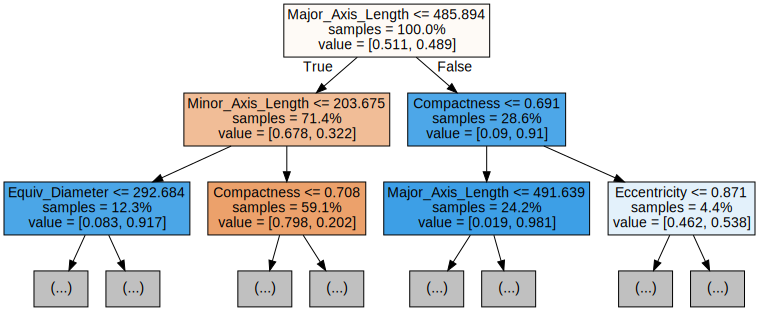

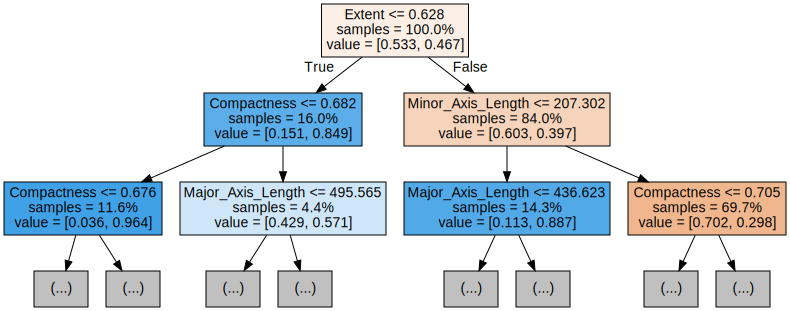

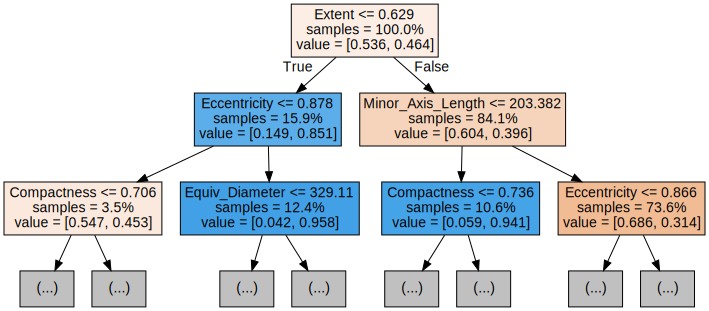

In [ ]:
for i in range(3):
    tree = Pumpkin_Seeds_dataset_model.estimators_[i]
    Pumpkin_Seeds_data = export_graphviz(tree, feature_names=x_train.columns, filled=True, max_depth=2, impurity=False, proportion=True)
    graph = graphviz.Source(Pumpkin_Seeds_data)
    display(graph)

In [ ]:
mean_Major_Axis_Length = Pumpkin_Seeds_dataset_2 ['Major_Axis_Length'].mean()

In [ ]:
mean_Minor_Axis_Length = Pumpkin_Seeds_dataset_2 ['Minor_Axis_Length'].mean()

In [ ]:
mean_Equiv_Diameter = Pumpkin_Seeds_dataset_2 ['Equiv_Diameter'].mean()

In [ ]:
mean_Eccentricity = Pumpkin_Seeds_dataset_2 ['Eccentricity'].mean()

In [ ]:
mean_Solidity = Pumpkin_Seeds_dataset_2 ['Solidity'].mean()

In [ ]:
mean_Extent = Pumpkin_Seeds_dataset_2 ['Extent'].mean()

In [ ]:
mean_Compactness = Pumpkin_Seeds_dataset_2 ['Compactness'].mean()

In [ ]:
min(Pumpkin_Seeds_dataset_2['Major_Axis_Length'])

320.8446

In [ ]:
max(Pumpkin_Seeds_dataset_2['Major_Axis_Length'])

661.9113

In [ ]:
#Simulation of the Random Forest Model

In [ ]:
Pumpkin_Seeds_dataset_model.predict([[ 340.84 , mean_Minor_Axis_Length, mean_Equiv_Diameter, mean_Eccentricity, mean_Solidity,mean_Extent,mean_Compactness]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
Pumpkin_Seeds_dataset_model.predict([[ 400.20 , mean_Minor_Axis_Length, mean_Equiv_Diameter, mean_Eccentricity, mean_Solidity,mean_Extent,mean_Compactness]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
Pumpkin_Seeds_dataset_model.predict([[ 420.86 , mean_Minor_Axis_Length, mean_Equiv_Diameter, mean_Eccentricity, mean_Solidity,mean_Extent,mean_Compactness]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
Pumpkin_Seeds_dataset_model.predict([[ 460.26 , mean_Minor_Axis_Length, mean_Equiv_Diameter, mean_Eccentricity, mean_Solidity,mean_Extent,mean_Compactness]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
Pumpkin_Seeds_dataset_model.predict([[ 500.46 , mean_Minor_Axis_Length, mean_Equiv_Diameter, mean_Eccentricity, mean_Solidity,mean_Extent,mean_Compactness]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
Pumpkin_Seeds_dataset_model.predict([[ 530.66 , mean_Minor_Axis_Length, mean_Equiv_Diameter, mean_Eccentricity, mean_Solidity,mean_Extent,mean_Compactness]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
Pumpkin_Seeds_dataset_model.predict([[ 660.86 , mean_Minor_Axis_Length, mean_Equiv_Diameter, mean_Eccentricity, mean_Solidity,mean_Extent,mean_Compactness]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Support Vector Machine Building

In [ ]:
import sklearn.svm

In [ ]:
Pumpkin_Seeds_dataset_model_SVM = sklearn.svm.SVC( kernel = 'linear')

In [ ]:
Pumpkin_Seeds_dataset_model_SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_predicted = Pumpkin_Seeds_dataset_model_SVM.predict( x_test)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_predicted))

Accuracy: 0.848


In [ ]:
print(confusion_matrix(y_test, y_predicted))

[[223  28]
 [ 48 201]]


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       251
           1       0.88      0.81      0.84       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [ ]:
# Data Visualization with Python

<Axes: xlabel='Major_Axis_Length', ylabel='Minor_Axis_Length'>

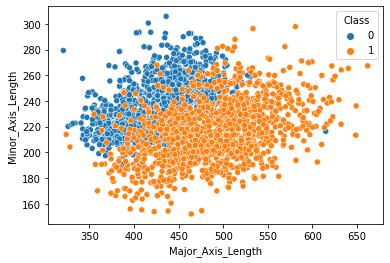

In [ ]:
sns.scatterplot(x= Pumpkin_Seeds_dataset_2['Major_Axis_Length'],y=Pumpkin_Seeds_dataset_2['Minor_Axis_Length'], hue=Pumpkin_Seeds_dataset_2['Class'])

<Axes: xlabel='Equiv_Diameter', ylabel='Eccentricity'>

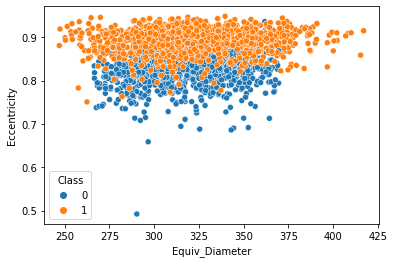

In [ ]:
sns.scatterplot(x= Pumpkin_Seeds_dataset_2['Equiv_Diameter'],y=Pumpkin_Seeds_dataset_2['Eccentricity'], hue=Pumpkin_Seeds_dataset_2['Class'])

<Axes: xlabel='Compactness', ylabel='Extent'>

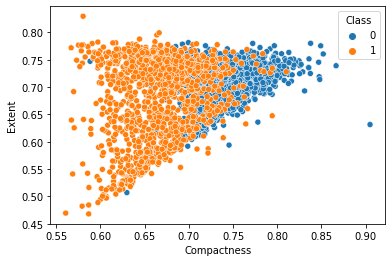

In [ ]:
sns.scatterplot(x= Pumpkin_Seeds_dataset_2['Compactness'],y=Pumpkin_Seeds_dataset_2['Extent'], hue=Pumpkin_Seeds_dataset_2['Class'])

In [ ]:
# K-NN classification model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn.score(x_test, y_test)

0.868

In [ ]:
y_predicted_knn = knn.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_predicted_knn)

In [ ]:
print(classification_report(y_test, y_predicted_knn))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       251
           1       0.90      0.83      0.86       249

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

